In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your datasets
df_ev = pd.read_csv("../data/vahan.csv", encoding='ISO-8859-1')
df_aqi = pd.read_csv("../data/aqi.csv", encoding='ISO-8859-1')

# Clean EV dataset
df_ev['fuel'] = df_ev['fuel'].str.lower()
df_ev['state'] = df_ev['state'].str.title()

# Total vehicles per state (all fuel types)
total_vehicles = (
    df_ev.groupby('state')['value']
    .sum()
    .reset_index()
    .rename(columns={'value': 'total_vehicles'})
)



In [2]:
unique_fuel_types = df_ev['fuel'].dropna().unique()
print("Unique fuel types in the dataset:")
for fuel_type in unique_fuel_types:
    print(f"- {fuel_type}")


Unique fuel types in the dataset:
- diesel
- petrol
- electric(bov)
- petrol/ethanol
- pure ev
- petrol/hybrid
- strong hybrid ev
- cng only
- petrol/cng
- ethanol
- diesel/hybrid
- not applicable
- lpg only
- plug-in hybrid ev
- lng
- dual diesel/lng
- petrol/lpg
- fuel cell hydrogen
- solar
- dual diesel/cng


In [3]:
ev_fuel_types = [
    'electric(bov)',
    'pure ev',
    'strong hybrid ev',
    'plug-in hybrid ev',
    'fuel cell hydrogen',
    'solar'
]

# Filter only EV-related vehicles
df_ev_electric = df_ev[df_ev['fuel'].isin(ev_fuel_types)]


In [4]:
# Total EVs per state
ev_totals = (
    df_ev_electric.groupby('state')['value']
    .sum()
    .reset_index()
    .rename(columns={'value': 'total_ev_vehicles'})
)

# Merge with total vehicles and calculate EV %
ev_merged = pd.merge(ev_totals, total_vehicles, on='state', how='left')
ev_merged['ev_percentage'] = (ev_merged['total_ev_vehicles'] / ev_merged['total_vehicles']) * 100

# Sort and print top states
top5_states = ev_merged.sort_values(by='ev_percentage', ascending=False)
#print(top5_states[['state', 'total_ev_vehicles', 'total_vehicles', 'ev_percentage']])

# Clean AQI dataset
df_aqi.rename(columns={'state': 'State', 'aqi_value': 'AQI', 'date': 'Date'}, inplace=True)
df_aqi['State'] = df_aqi['State'].str.title()
df_aqi['Date'] = pd.to_datetime(df_aqi['Date'], dayfirst='True',  errors='coerce')
df_aqi['AQI'] = pd.to_numeric(df_aqi['AQI'], errors='coerce')
df_aqi = df_aqi.dropna(subset=['AQI'])

# Get average AQI per state
avg_aqi = df_aqi.groupby('State')['AQI'].mean().reset_index()
avg_aqi.rename(columns={'AQI': 'avg_aqi'}, inplace=True)

# Merge with top 5 EV % states
plot_df = pd.merge(top5_states, avg_aqi, left_on='state', right_on='State', how='left')
print(plot_df)
plot_df.to_csv('ev.csv')


                                       state  total_ev_vehicles  \
0                                    Tripura              22631   
1                                      Delhi             245938   
2                                 Chandigarh              17888   
3                                      Assam             183428   
4                                     Kerala             226600   
5                                  Karnataka             480191   
6                              Uttar Pradesh             921471   
7                                Maharashtra             650823   
8                                      Bihar             280947   
9                                Uttarakhand              55704   
10                                    Odisha             153213   
11                                 Rajasthan             305605   
12                              Chhattisgarh             117666   
13                                Tamil Nadu             32963

C:\Users\sugan\AppData\Local\Temp\ipykernel_21628\1186074444.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


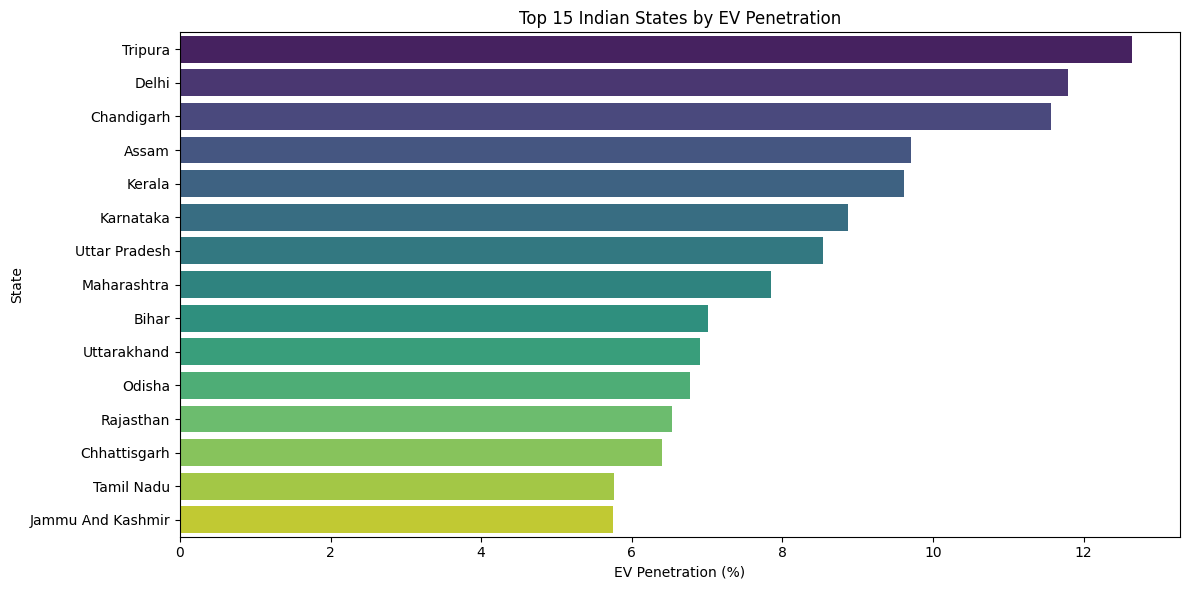

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top5_states.head(15),
    x='ev_percentage',
    y='state',
    palette='viridis'
)
plt.xlabel('EV Penetration (%)')
plt.ylabel('State')
plt.title('Top 15 Indian States by EV Penetration')
plt.tight_layout()
plt.show()


In [6]:
print(df_ev_electric.columns)

Index(['year', 'month', 'state', 'rto', 'vehicle_class', 'fuel', 'value',
       'unit', 'note'],
      dtype='object')


In [7]:
# Label as 'EV' or 'Other'
df_ev['ev_type'] = df_ev['fuel'].apply(lambda x: 'EV' if x in ev_fuel_types else 'Other')


In [8]:
# Now group by all vehicles (EV + Other)
df_yearly_state = (
    df_ev.groupby(['year', 'state', 'ev_type'])['value']
    .sum()
    .reset_index()
    .rename(columns={'ev_type': 'type'})
)
df_yearly_state

,year,state,type,value
0,2022,Andaman And Nicobar Islands,EV,21
1,2022,Andaman And Nicobar Islands,Other,5500
2,2022,Andhra Pradesh,EV,21654
3,2022,Andhra Pradesh,Other,601064
4,2022,Arunachal Pradesh,EV,2
...,...,...,...,...
263,2025,Uttar Pradesh,Other,1153524
264,2025,Uttarakhand,EV,5552
265,2025,Uttarakhand,Other,79758
266,2025,West Bengal,EV,21542


In [9]:
df_aqi['year'] = df_aqi['Date'].dt.year
df_aqi.rename(columns={'State': 'state'},inplace=True)
df_aqi

,Date,state,area,number_of_monitoring_stations,prominent_pollutants,AQI,air_quality_status,unit,note,year
0,2025-04-30,Maharashtra,Amravati,2,PM10,78,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN,2025
1,2025-04-30,Bihar,Purnia,1,CO,56,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN,2025
2,2025-04-30,Madhya Pradesh,Katni,1,O3,98,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN,2025
3,2025-04-30,Chhattisgarh,Tumidih,1,PM10,103,Moderate,number_of_monitoring_stations in Absolute Numb...,NaN,2025
4,2025-04-30,Assam,Byrnihat,1,PM2.5,61,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN,2025
...,...,...,...,...,...,...,...,...,...,...
235780,2022-04-01,Bihar,Arrah,1,PM10,210,Poor,number_of_monitoring_stations in Absolute Numb...,NaN,2022
235781,2022-04-01,Rajasthan,Jaipur,3,"PM2.5,PM10",158,Moderate,number_of_monitoring_stations in Absolute Numb...,NaN,2022
235782,2022-04-01,Maharashtra,Chandrapur,2,PM2.5,201,Poor,number_of_monitoring_stations in Absolute Numb...,NaN,2022
235783,2022-04-01,Uttar Pradesh,Varanasi,4,PM10,128,Moderate,number_of_monitoring_stations in Absolute Numb...,NaN,2022


In [21]:
# Pivot for stacked bar chart
ev_pivot = df_yearly_state.pivot_table(index=['year', 'state'], columns='type', values='value', fill_value=0).reset_index()

# Merge with AQI data
# Assume df_aqi has ['state', 'year', 'AQI']
plot_df = pd.merge(ev_pivot, df_aqi[['state', 'year', 'AQI']], on=['state', 'year'], how='left')

# Optional: filter top 10 EV states only
top_10_states = ev_merged.sort_values(by='ev_percentage', ascending=False).head(10)['state']
plot_df = plot_df[plot_df['state'].isin(top_10_states)]


In [22]:
print(plot_df)

        year        state       EV     Other    AQI
1229    2022        Assam  32482.0  364501.0   39.0
1230    2022        Assam  32482.0  364501.0  292.0
1231    2022        Assam  32482.0  364501.0  362.0
1232    2022        Assam  32482.0  364501.0  315.0
1233    2022        Assam  32482.0  364501.0  247.0
...      ...          ...      ...       ...    ...
233853  2025  Uttarakhand   5552.0   79758.0   78.0
233854  2025  Uttarakhand   5552.0   79758.0  191.0
233855  2025  Uttarakhand   5552.0   79758.0  107.0
233856  2025  Uttarakhand   5552.0   79758.0  110.0
233857  2025  Uttarakhand   5552.0   79758.0  202.0

[105227 rows x 5 columns]


In [23]:
# Step 1: Aggregate AQI to yearly average per state
aqi_avg = df_aqi.groupby(['state', 'year'])['AQI'].mean().reset_index()

# Step 2: Merge with vehicle data (EV + Other already pivoted)
plot_df = pd.merge(ev_pivot, aqi_avg, on=['state', 'year'], how='left')

# Step 3: Optional - filter to 2022–2025 and top states
plot_df = plot_df[plot_df['year'].between(2022, 2025)]
plot_df = plot_df[plot_df['state'].isin(top_10_states)]


In [24]:
print(plot_df)

     year          state        EV      Other         AQI
3    2022          Assam   32482.0   364501.0   84.873762
4    2022          Bihar   45218.0   838508.0  168.909243
5    2022     Chandigarh    2372.0    37960.0  130.567273
8    2022          Delhi   48311.0   427161.0  198.887273
14   2022      Karnataka   76921.0  1107335.0   59.641975
15   2022         Kerala   32353.0   552839.0   65.212660
19   2022    Maharashtra  109867.0  1698413.0  105.400178
30   2022        Tripura    3306.0    36305.0   79.700730
31   2022  Uttar Pradesh  133438.0  2185722.0  135.211501
32   2022    Uttarakhand   13136.0   169788.0   85.000000
37   2023          Assam   60798.0   592801.0  116.877562
38   2023          Bihar   88199.0  1199474.0  173.278300
39   2023     Chandigarh    6411.0    46813.0  138.813699
42   2023          Delhi   73613.0   583031.0  203.632877
48   2023      Karnataka  152086.0  1590347.0   65.609942
49   2023         Kerala   75460.0   679050.0   72.889072
52   2023    M

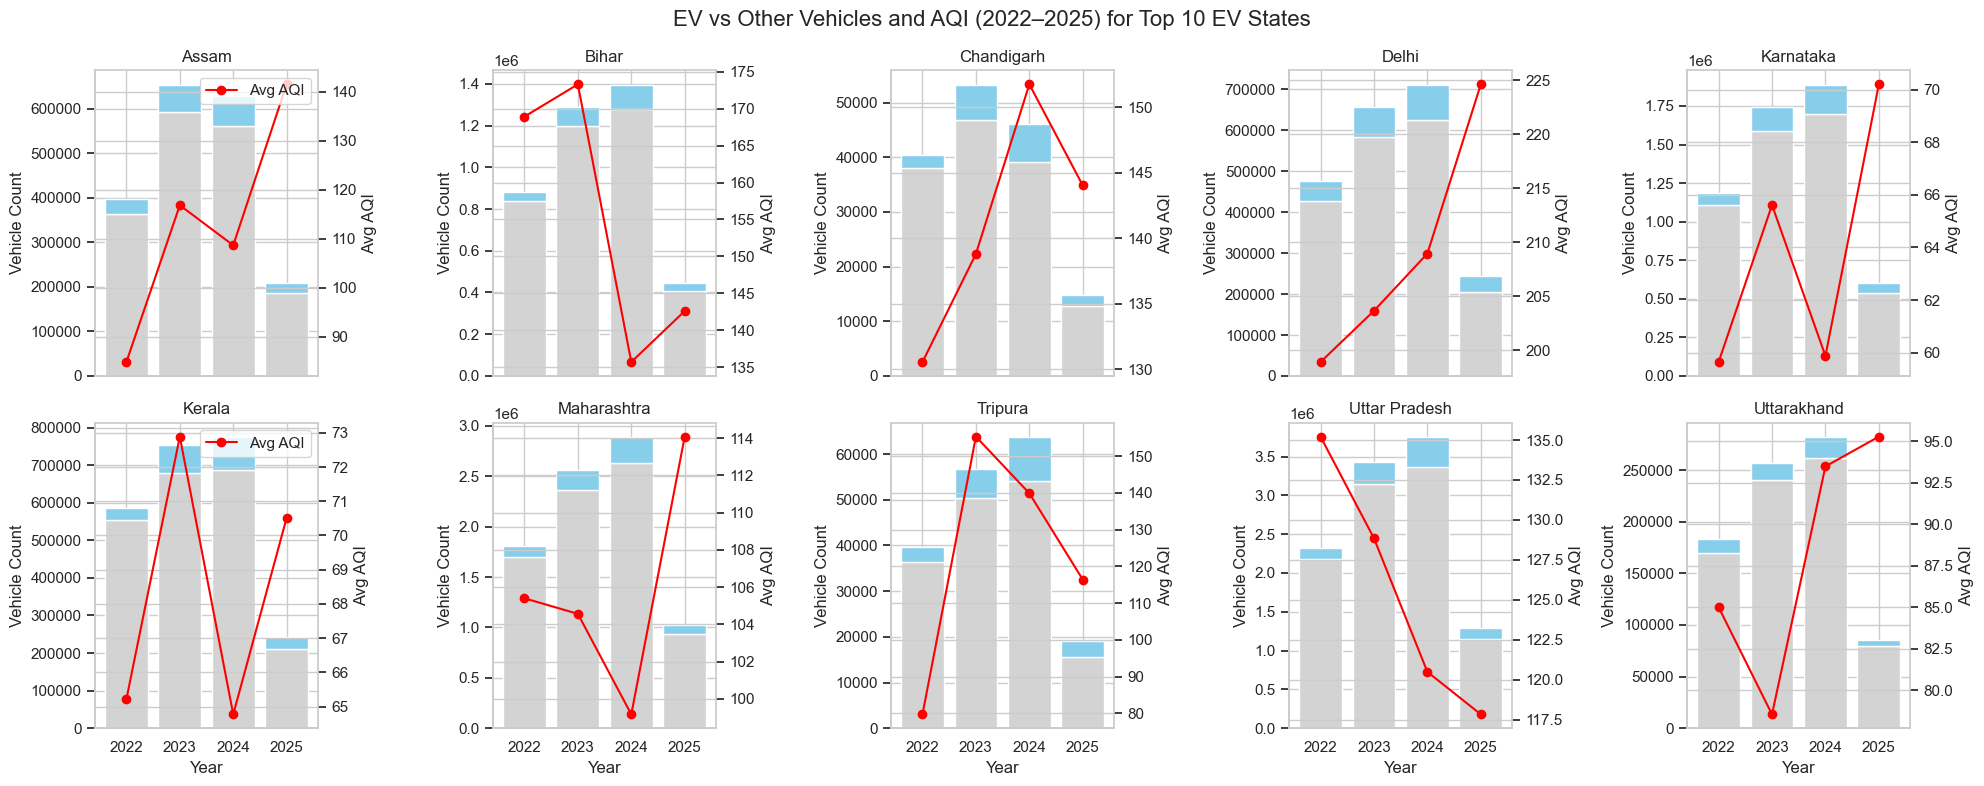

In [25]:
sns.set(style="whitegrid")
g = sns.FacetGrid(plot_df, col="state", col_wrap=5, height=4, sharey=False)

def plot_combined(data, **kwargs):
    ax = plt.gca()
    ax.bar(data['year'], data.get('Other', 0), label='Other Vehicles', color='lightgray')
    ax.bar(data['year'], data.get('EV', 0), bottom=data.get('Other', 0), label='EVs', color='skyblue')
    ax2 = ax.twinx()
    ax2.plot(data['year'], data['AQI'], marker='o', color='red', label='Avg AQI')
    ax.set_ylabel("Vehicle Count")
    ax2.set_ylabel("Avg AQI")
    ax.set_xlabel("Year")
    ax.set_xticks([2022, 2023, 2024, 2025])
    ax.set_title(data['state'].iloc[0])
    if ax.get_subplotspec().is_first_col():
        ax.legend(loc='upper left')
        ax2.legend(loc='upper right')

g.map_dataframe(plot_combined)
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle("EV vs Other Vehicles and AQI (2022–2025) for Top 10 EV States", fontsize=16)

plt.tight_layout()
plt.show()
